## **Step 1: Setup and Install Required Libraries**

In [ ]:
!pip install gensim nltk scikit-learn matplotlib pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.4 MB/s eta 0:00:00


In [ ]:
import nltk
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
from sklearn.cluster import KMeans
import numpy as np

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Step 2: Data **Collection**

In [ ]:
# Importing the 20 Newsgroups dataset from scikit-learn
from sklearn.datasets import fetch_20newsgroups

# Fetching a subset of the dataset for the analysis
categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

documents = newsgroups_data.data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Step 3: Text **Preprocessing**

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Removing stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return tokens

# Apply preprocessing to all documents
processed_docs = [preprocess_text(doc) for doc in documents]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Step 4: Topic Modeling with **LDA**

In [ ]:
# Creating a dictionary and a corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Applying LDA to uncover hidden topics
lda_model = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=10)

# Displaying the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.006*"graphics" + 0.005*"please" + 0.005*"send" + 0.004*"computer" + 0.004*"also" + 0.004*"would" + 0.004*"information" + 0.004*"available" + 0.003*"mail" + 0.003*"university"
Topic: 1 
Words: 0.015*"god" + 0.008*"jesus" + 0.008*"one" + 0.006*"would" + 0.005*"people" + 0.005*"us" + 0.005*"christ" + 0.004*"sin" + 0.003*"also" + 0.003*"paul"
Topic: 2 
Words: 0.008*"image" + 0.005*"jpeg" + 0.005*"use" + 0.005*"also" + 0.004*"file" + 0.004*"one" + 0.004*"get" + 0.003*"images" + 0.003*"medical" + 0.003*"would"
Topic: 3 
Words: 0.009*"one" + 0.009*"would" + 0.007*"people" + 0.007*"god" + 0.007*"think" + 0.005*"know" + 0.005*"believe" + 0.005*"like" + 0.004*"say" + 0.004*"many"


## Step 5: Visualization of Discovered **Topics**

In [ ]:
# Visualization using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.122025 -0.016149       1        1  34.384107
2     -0.104471 -0.120115       2        1  28.800422
1      0.149785  0.038547       3        1  23.304957
0     -0.167339  0.097717       4        1  13.510514, topic_info=          Term         Freq        Total Category  logprob  loglift
230        god  2303.000000  2303.000000  Default  30.0000  30.0000
1942     jesus   883.000000   883.000000  Default  29.0000  29.0000
997      image  1050.000000  1050.000000  Default  28.0000  28.0000
1059      jpeg   619.000000   619.000000  Default  27.0000  27.0000
943   graphics   506.000000   506.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
240       like   164.208340  1334.360935   Topic4  -5.8068  -0.0934
363        get   147.959400  1032.157843   Topic4  -5.9110   0.0592
997      image   144.871312  1050.600114   Topic4  -5.9321   0.0204
87      anyone   130.159353   622.283708   Topic4  -6.0392   0.4371
97        know   133.684463  1347.125344   Topic4  -6.0125  -0.3085

[348 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
3549       1  0.908713  absolute
3549       2  0.047329  absolute
3549       3  0.018932  absolute
3549       4  0.018932  absolute
13152      4  0.980327       acm
...      ...       ...       ...
471        4  0.068317     world
83         1  0.524002     would
83         2  0.141667     would
83         3  0.248538     would
83         4  0.085746     would

[684 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

## Step 6: Word Embeddings (Optional)**bold text**

In [ ]:
# Generating Word2Vec embeddings for the words
from gensim.models import Word2Vec

word2vec_model = Word2Vec(processed_docs, vector_size=100, window=5, min_count=2, workers=4)

# Example: Finding similar words
similar_words = word2vec_model.wv.most_similar('computer', topn=5)
print(similar_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('data', 0.9914151430130005), ('workstations', 0.9869677424430847), ('unix', 0.9852980971336365), ('visualisation', 0.984917938709259), ('programs', 0.9835635423660278)]


## Step 7: Document **Similarity**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


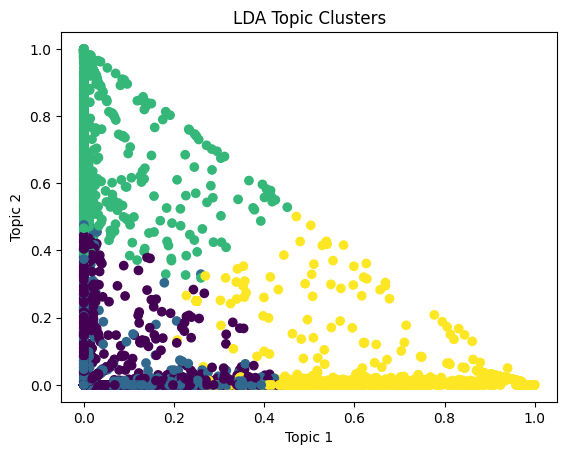

In [ ]:
# Representing documents using LDA topic distributions
lda_vectors = [lda_model.get_document_topics(bow) for bow in corpus]
lda_vectors = [[dict(doc).get(i, 0) for i in range(lda_model.num_topics)] for doc in lda_vectors]

# Calculating cosine similarity between LDA vectors
similarity_matrix_lda = cosine_similarity(lda_vectors)

# Clustering documents using KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
lda_clusters = kmeans.fit_predict(lda_vectors)

# Visualizing the clusters
plt.scatter(np.array(lda_vectors)[:, 0], np.array(lda_vectors)[:, 1], c=lda_clusters)
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title('LDA Topic Clusters')
plt.show()



## Step 8: Analysis & **Interpretation**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Cosine Similarity Matrix:
 [[1.         0.40589141 0.83331403 ... 0.7989558  0.79141561 0.82591955]
 [0.40589141 1.         0.70971655 ... 0.53262895 0.52651969 0.25359281]
 [0.83331403 0.70971655 1.         ... 0.55332571 0.54119836 0.68436341]
 ...
 [0.7989558  0.53262895 0.55332571 ... 1.         0.99989354 0.5372    ]
 [0.79141561 0.52651969 0.54119836 ... 0.99989354 1.         0.52957259]
 [0.82591955 0.25359281 0.68436341 ... 0.5372     0.52957259 1.        ]]
Word Embeddings Cosine Similarity Matrix:
 [[1.         0.97627563 0.         ... 0.94280219 0.94260656 0.96907714]
 [0.97627563 1.         0.         ... 0.98730721 0.98792072 0.99794799]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.94280219 0.98730721 0.         ... 1.         0.99658699 0.99277983]
 [0.94260656 0.98792072 0.         ... 0.99658699 1.         0.99156395]
 [0.96907714 0.99794799 0.         ... 0.99277983 0.99156395 1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


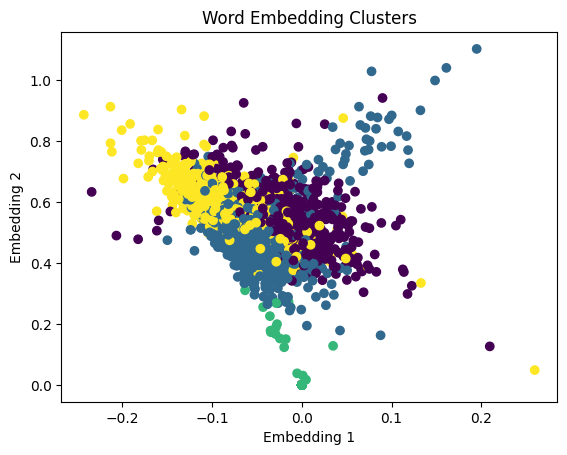

In [ ]:
# Print the similarity matrix
print("LDA Cosine Similarity Matrix:\n", similarity_matrix_lda)

# Clustering based on word embeddings
word_vectors = [np.mean([word2vec_model.wv[word] for word in doc if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for doc in processed_docs]
similarity_matrix_w2v = cosine_similarity(word_vectors)

# Print the similarity matrix for Word Embeddings
print("Word Embeddings Cosine Similarity Matrix:\n", similarity_matrix_w2v)

# Clustering documents using KMeans based on Word2Vec embeddings
w2v_clusters = kmeans.fit_predict(word_vectors)

# Visualizing the clusters
plt.scatter(np.array(word_vectors)[:, 0], np.array(word_vectors)[:, 1], c=w2v_clusters)
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')
plt.title('Word Embedding Clusters')
plt.show()
